In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_table("SMSSpamCollection+(1)", header= None, names=["Class", "sms"])
df.head()

C:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.tail()

,Class,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
df.shape

(5572, 2)

In [5]:
df.describe()

,Class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
ham_spam = df.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [7]:
df["label"] = df.Class.map({"ham":0, "spam":1})
df.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
X = df.sms
y = df.label

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state= 1)

In [10]:
Xtrain.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words="english")

In [12]:
vect.fit(Xtrain)
vect.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6673,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6665,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6614,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6852,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7127,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6876,
 'wiskey': 7012,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [13]:
Xtrain_trans = vect.transform(Xtrain)
Xtest_trans = vect.transform(Xtest)

In [14]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(Xtrain_trans, ytrain)
ypredClass = mnb.predict(Xtest_trans)
ypredProb = mnb.predict_proba(Xtest_trans)

In [15]:
from sklearn import metrics
metrics.accuracy_score(ytest, ypredClass)

0.9877961234745154

In [16]:
metrics.confusion_matrix(ytest, ypredClass)

array([[1201,    7],
       [  10,  175]], dtype=int64)

In [17]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(Xtrain_trans, ytrain)
ypredClass = bnb.predict(Xtest_trans)
ypredProb = bnb.predict_proba(Xtest_trans)

In [18]:
metrics.accuracy_score(ytest, ypredClass)

0.9770279971284996

In [31]:
metrics.confusion_matrix(ytest, ypredClass)

array([[1207,    1],
       [  31,  154]], dtype=int64)

In [19]:
confusion = metrics.confusion_matrix(ytest, ypredClass)
TN = confusion[0, 0]
TP = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [20]:
sensitivity = TP/float(FN+TP)
sensitivity

0.8324324324324325

In [21]:
specificity = TN / float(TN+FP)
specificity

0.9991721854304636

In [22]:
precision = TP/float(TP+FP)
precision

0.9935483870967742

In [23]:
metrics.precision_score(ytest, ypredClass)

0.9935483870967742

In [24]:
metrics.f1_score(ytest, ypredClass)

0.9058823529411765

In [25]:
from sklearn.metrics import confusion_matrix as cnfmat
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(ytest, ypredProb[:, 1])
roc_auc = auc(fpr, tpr)

In [26]:
roc_auc

0.9967692858421334

In [27]:
tpr

array([0.        , 0.25405405, 0.28648649, 0.2972973 , 0.3027027 ,
       0.32432432, 0.6       , 0.61081081, 0.61621622, 0.62702703,
       0.68648649, 0.6972973 , 0.74054054, 0.74054054, 0.76216216,
       0.77297297, 0.83243243, 0.83243243, 0.85945946, 0.85945946,
       0.87567568, 0.87567568, 0.92972973, 0.92972973, 0.94594595,
       0.94594595, 0.95135135, 0.95135135, 0.96216216, 0.96216216,
       0.96756757, 0.96756757, 0.97297297, 0.97297297, 0.97297297,
       0.97297297, 0.97837838, 0.97837838, 0.99459459, 0.99459459,
       0.99459459, 0.99459459, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [28]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.27814570e-04, 8.27814570e-04, 8.27814570e-04,
       8.27814570e-04, 1.65562914e-03, 1.65562914e-03, 2.48344371e-03,
       2.48344371e-03, 3.31125828e-03, 3.31125828e-03, 4.13907285e-03,
       4.13907285e-03, 5.79470199e-03, 5.79470199e-03, 7.45033113e-03,
       7.45033113e-03, 8.27814570e-03, 8.27814570e-03, 1.57284768e-02,
       1.57284768e-02, 4.63576159e-02, 4.80132450e-02, 7.11920530e-02,
       7.11920530e-02, 9.27152318e-02, 9.27152318e-02, 9.43708609e-02,
       9.60264901e-02, 1.28311258e-01, 1.28311258e-01, 2.14403974e-01,
       2.16059603e-01, 2.20198675e-01, 2.23509934e-01, 2.31788079e-01,
       2.34271523e-01, 2.47516556e-01, 2.49172185e-01, 2.65728477e-01,
       2.69039735e-01, 2.77317881e-01, 2.78973510e-01, 2.90562914e-01,
      

In [29]:
pd.DataFrame({"Threshold":threshold, "TPR": tpr, "FPR": fpr})

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.254054,0.000000
2,1.000000e+00,0.286486,0.000000
3,1.000000e+00,0.297297,0.000000
4,1.000000e+00,0.302703,0.000000
5,1.000000e+00,0.324324,0.000000
6,9.999979e-01,0.600000,0.000000
7,9.999964e-01,0.610811,0.000000
8,9.999950e-01,0.616216,0.000000
9,9.999950e-01,0.627027,0.000000


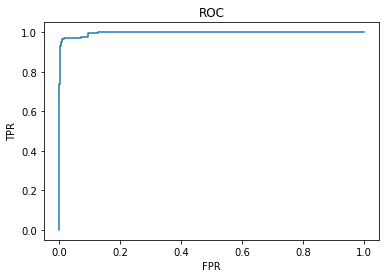

In [30]:
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.title("ROC")
plt.plot(fpr, tpr)